# Further Processing of Predictor Layers

## **Introduction**
Species Distribution Modelling (SDM) requires high-quality and consistent environmental predictor layers to ensure accurate and meaningful predictions. Amphibian habitat suitability, in particular, is influenced by various environmental factors, ranging from vegetation cover and soil moisture to pollution and distance to water bodies. The importance of these predictors, their relevance to amphibians, and the data sources used to create them are detailed in Notebook `2_Environmental_Predictors.ipynb`. Before these predictors can be used in the model, a series of preprocessing steps is required to standardise their properties and ensure consistency.

---

## **Preprocessing Steps**
### **1. Standardisation of Predictors**
To ensure all predictor layers are comparable, each raster was standardised to a common range of **0 to 1**, where:
- **0** represents the lowest intensity for the variable.
- **1** represents the highest intensity for the variable.

### **2. Consistency in Extent and Resolution**
To avoid spatial mismatches during analysis, all rasters were clipped to the same study area extent and resampled to a **30m resolution**. This step ensures that all predictor layers align perfectly and are directly comparable.

### **3. Projection**
All predictor layers were reprojected to the **British National Grid (EPSG: 27700)**, ensuring consistency in coordinate systems across the dataset.

### **4. Handling NoData Values**
NoData values were unified across all rasters by setting them to **-9999**. This ensures:
- Clear differentiation between valid data and missing values.
- Compatibility with species distribution modelling tools, which require uniform NoData definitions.

### **Why These Steps Matter**
These preprocessing steps are essential to avoid errors during modelling and to ensure that the results are ecologically meaningful. Misaligned rasters, inconsistent projections, or unstandardised values can lead to inaccurate predictions and compromise the integrity of the model.

---

## **Visualising and Verifying Predictors**
Below, each predictor is visualised to visually examine its distribution, and describe how it is expected to influence amphibian habitat suitability.



## 1. Distance to Woodland

### **Objective**
To visualise and verify the `Distance to Woodland` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Wood_Resample.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process.


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


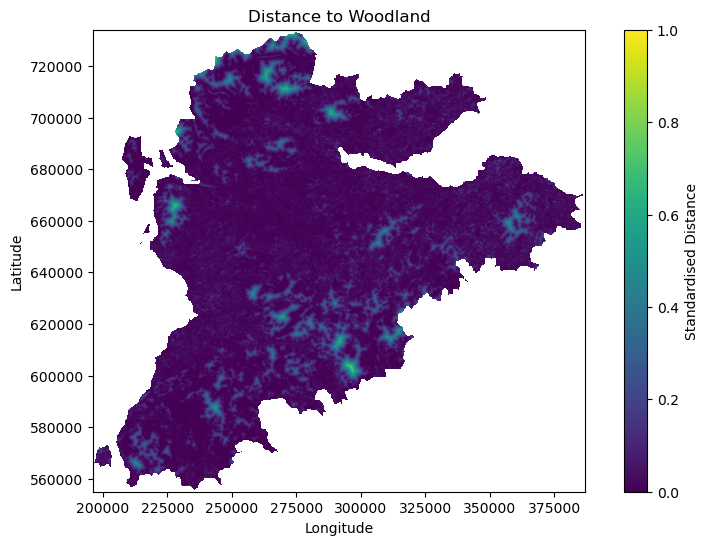

In [4]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Wood_Resample.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Distance to Woodland")
plt.imshow(data, cmap="viridis", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Distance")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Distance_to_Woodland.png"), dpi=300)
plt.show()

### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), which is consistent with the study area's coordinate reference system, ensuring spatial alignment with other predictors.
- **Extent**: The raster covers the expected spatial boundaries of the study area, as indicated by the bounding box.
- **Resolution**: A resolution of **30m x 30m** is consistent with the standard resolution for all predictors, maintaining uniformity in spatial detail.
- **No Data Value**: The no-data value is correctly set to **-9999.0**, which ensures that missing or irrelevant data does not interfere with model performance.
- **Data Range**: The predictor is standardised, with values ranging from **0.0 to 1.0**, making it ready for integration into species distribution modelling.

#### **Important Note on Predictor Impact**
It is important to note that, as currently expressed, this predictor represents a **negative impact on amphibians**. Areas further from woodlands (values closer to 1) are considered less suitable for amphibians due to reduced access to shaded and moist environments critical for their survival. In the next section, the predictor will be adjusted to reflect its **positive impact** by inverting the values so that areas closer to woodlands (currently 0) are represented as more suitable (closer to 1). This adjustment ensures the predictor aligns with ecological expectations and improves interpretability within the SDM.

---


## 2. Distance to Water

### **Objective**
To visualise and verify the Distance to Water predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/DistWater.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted and reviewed.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process: the SDM.


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195962.10163310927, bottom=554933.5372726112, right=387032.10163310927, top=734063.5372726112)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


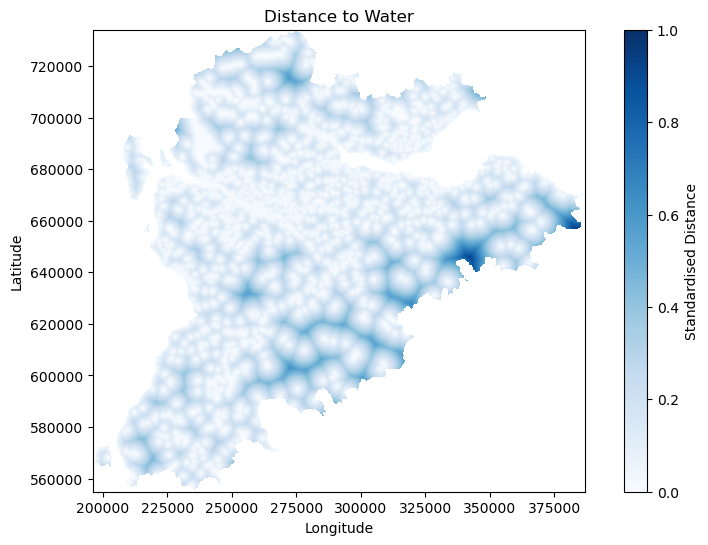

In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/DistWater.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Distance to Water")
plt.imshow(data, cmap="Blues", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Distance")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Distance_to_Water.png"), dpi=300)
plt.show()


### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial alignment with other predictor layers and consistency within the study area's coordinate reference system.
- **Extent**: The bounding box indicates that the raster accurately covers the study area, with no unexpected discrepancies in the spatial coverage.
- **Resolution**: The raster has a resolution of **30m x 30m**, matching the standard resolution adopted for all predictors. This uniformity ensures consistent spatial analysis across the dataset.
- **No Data Value**: The no-data value is set to **-9999.0**, ensuring that missing or irrelevant data does not introduce errors or biases in the modelling process.
- **Data Range**: The raster is standardised, with values ranging from **0.0 to 1.0**, making it directly usable in species distribution modelling (SDM).

#### **Important Note on Predictor Impact**
As currently expressed, this predictor represents a **negative impact on amphibians**, with areas further from water bodies (values closer to 1) being less suitable due to reduced access to critical aquatic resources. Amphibians depend on proximity to water for breeding, hydration, and thermoregulation.

In the next section, this predictor will be adjusted to reflect its **positive impact** by inverting the values. After adjustment, areas closer to water (currently 0) will be represented as more suitable (closer to 1), aligning the predictor with ecological expectations and ensuring accurate representation of habitat suitability in the SDM.

---

## 3. Grassland Density (250m Radius)

### **Objective**
To visualise and verify the `Grassland Density (250m Radius)` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Grass_Stand.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process.in the SDM.


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


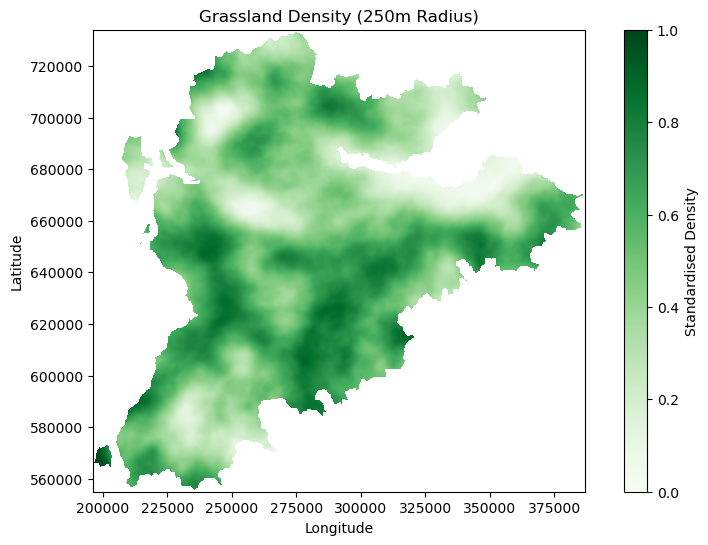

In [9]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Grass_Stand.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Grassland Density (250m Radius)")
plt.imshow(data, cmap="Greens", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Grassland_Density.png"), dpi=300)
plt.show()

### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial alignment with other predictor layers and consistency within the study area's coordinate reference system.
- **Extent**: The bounding box indicates that the raster accurately covers the study area, with no unexpected discrepancies in the spatial coverage.
- **Resolution**: The raster has a resolution of **30m x 30m**, matching the standard resolution adopted for all predictors. This uniformity ensures consistent spatial analysis across the dataset.
- **No Data Value**: The no-data value is set to **-9999.0**, ensuring that missing or irrelevant data does not introduce errors or biases in the modelling process.
- **Data Range**: The raster is standardised, with values ranging from **0.0 to 1.0**, making it directly usable in species distribution modelling (SDM).

#### **Important Note on Predictor Impact**
This predictor, representing **grassland density within a 250m radius**, is considered a **positive influence on amphibians**. Grasslands are critical for amphibian populations as they provide essential foraging habitats, shelter, and movement corridors. Areas with higher grassland density (values closer to 1) are more suitable for amphibians due to increased resource availability and connectivity.

Unlike predictors with negative impacts (e.g., pollution or proximity to roads), no adjustment is needed for this layer. The positive relationship between grassland density and habitat suitability aligns with ecological expectations, making this raster ready for direct use in SDM.

---


## 4. Vegetation Height

### **Objective**
To visualise and verify the `Vegetation Height` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/VegHeight.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process.

Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


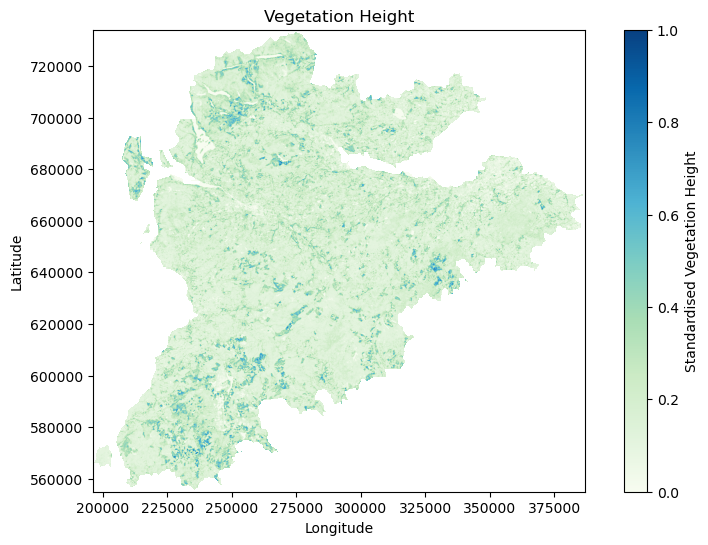

In [11]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/VegHeight.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Vegetation Height")
plt.imshow(data, cmap="GnBu", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Vegetation Height")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Vegetation_Height.png"), dpi=300)
plt.show()

### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), which aligns with the study area's coordinate reference system. This ensures spatial consistency with other environmental predictors.
- **Extent**: The bounding box confirms that the raster fully encompasses the study area, with no discrepancies in coverage.
- **Resolution**: A resolution of **30m x 30m** matches the standard resolution for all predictors, ensuring uniformity in spatial detail across the dataset.
- **No Data Value**: The no-data value is appropriately set to **-9999.0**, ensuring that cells with missing data do not interfere with subsequent analyses.
- **Data Range**: The raster values are standardised within the range of **0.0 to 1.0**, making it immediately usable for integration into species distribution modelling (SDM).

#### **Important Note on Predictor Impact**
Vegetation height is inherently a **positive predictor** for amphibian habitat suitability. Taller vegetation provides increased shade and moisture retention, which are critical for amphibian survival, particularly during hot or dry conditions. Therefore, no further adjustments to the predictor's values are necessary, as areas with higher vegetation height (values closer to 1) are already represented as more suitable.

This predictor is ready for inclusion in the SDM, accurately capturing the ecological benefits of vegetation height for amphibians.

---


## 5. Building Density

### **Objective**
To visualise and verify the `Building Density` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Building_Density.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process.


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


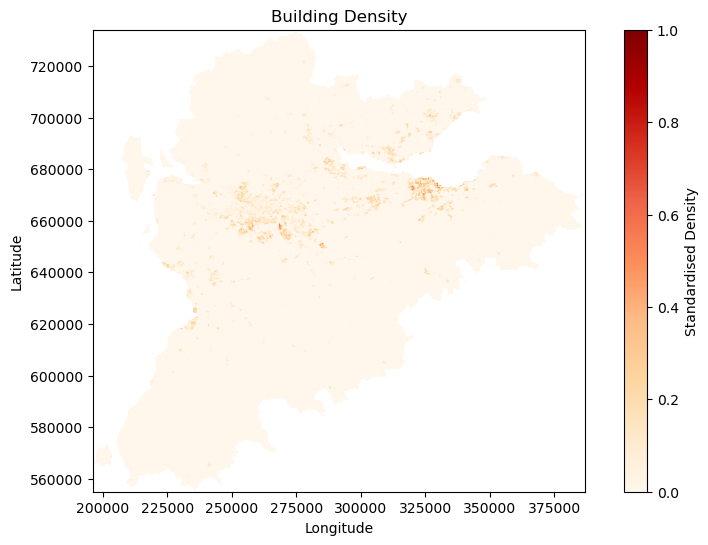

In [14]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Building_Density.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Building Density")
plt.imshow(data, cmap="OrRd", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Building_Density.png"), dpi=300)
plt.show()


### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial alignment with other predictor layers and maintaining consistency within the study area's coordinate reference system.
- **Extent**: The bounding box confirms that the raster fully covers the study area, with no unexpected discrepancies in spatial coverage.
- **Resolution**: The raster's resolution of **30m x 30m** aligns with the standard resolution for all predictors, enabling uniform spatial analysis across the dataset.
- **No Data Value**: The no-data value is appropriately set to **-9999.0**, ensuring missing or irrelevant data does not interfere with the modelling process.
- **Data Range**: The raster is standardised, with values ranging from **0.0 to 1.0**, making it suitable for integration into species distribution modelling (SDM).

#### **Important Note on Predictor Impact**
As currently expressed, the **Building Density** predictor represents a **negative impact on amphibians**, where areas with higher building density (values closer to 1) are less suitable due to increased urbanisation, habitat fragmentation, and impermeable surfaces. However, to maintain consistency in the interpretation of predictor values across the SDM:
- Values closer to **1** should represent more suitable conditions for amphibians.
- Values closer to **0** should represent less suitable conditions.

In the next section, the predictor will be inverted to reflect its **positive impact**, where areas with lower building density will be assigned values closer to 1, aligning with ecological expectations and improving interpretability within the SDM.

---

## 6. Traffic Intensity

### **Objective**
To visualise and verify the `Traffic Intensity` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Traffic.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process.


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


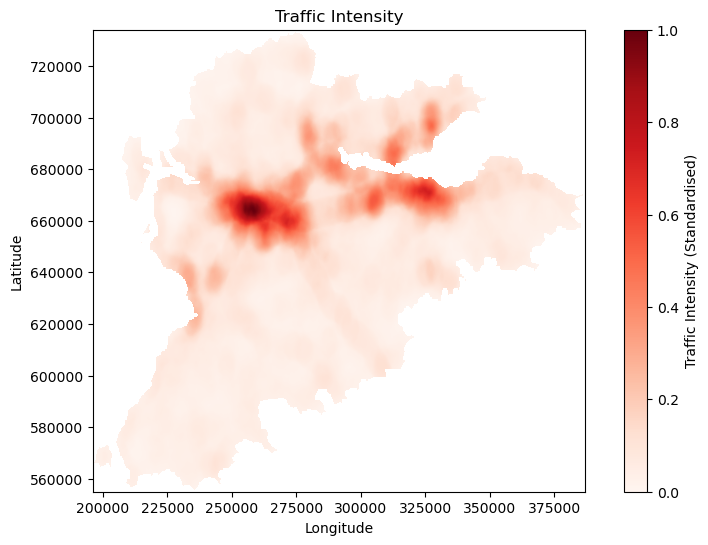

In [15]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Traffic.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Traffic Intensity")
plt.imshow(data, cmap="Reds", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Traffic Intensity (Standardised)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Traffic_Intensity.png"), dpi=300)
plt.show()

### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial alignment with other predictor layers and consistency within the study area's coordinate reference system.
- **Extent**: The bounding box accurately matches the spatial extent of the study area, confirming that the raster is clipped correctly.
- **Resolution**: The raster's resolution of **30m x 30m** is consistent with the standard resolution used for all predictors, facilitating uniform spatial analysis across the dataset.
- **No Data Value**: The no-data value is set to **-9999.0**, ensuring that missing or irrelevant data does not interfere with species distribution modelling (SDM).
- **Data Range**: The raster is standardised, with values ranging from **0.0 to 1.0**, making it suitable for integration into SDMs.

#### **Important Note on Predictor Impact**
Currently, the `Traffic Intensity` predictor represents a **negative impact on amphibians**, where higher traffic intensity (values closer to 1) is associated with decreased habitat suitability due to increased mortality risk and habitat fragmentation. 

To align with ecological expectations and improve model interpretability, the predictor will be **reversed** in the next section. This adjustment will ensure that areas with lower traffic intensity (currently closer to 0) are represented as more suitable for amphibians (closer to 1), while areas with higher traffic intensity will be represented as less suitable (closer to 0).

---


## 7. Pollution Levels (NOx)

### **Objective**
To visualise and verify the `Pollution Levels (NOx)` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/NOx_Stand.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process:oser to 0).


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195962.10163310927, bottom=554933.5372726112, right=387032.10163310927, top=734063.5372726112)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


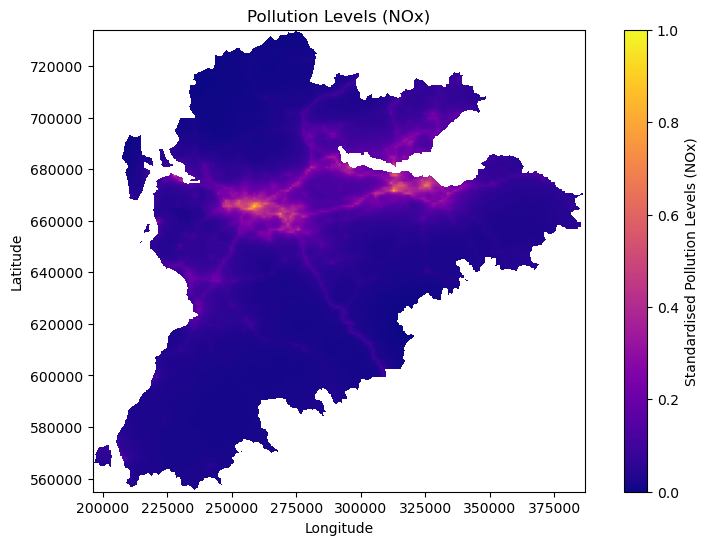

In [20]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/NOx_Stand.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Pollution Levels (NOx)")
plt.imshow(data, cmap="plasma", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Pollution Levels (NOx)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Pollution_Levels_NOx.png"), dpi=300)
plt.show()


### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial consistency with other predictor layers and the study area's coordinate reference system.
- **Extent**: The bounding box confirms the raster accurately covers the study area without discrepancies, aligning well with the project's spatial boundaries.
- **Resolution**: A resolution of **30m x 30m** matches the standard resolution of all predictors, maintaining uniformity in spatial detail for species distribution modelling (SDM).
- **No Data Value**: The no-data value is properly set to **-9999.0**, ensuring that irrelevant or missing data does not interfere with the modelling process or introduce bias.
- **Data Range**: The raster is standardised with values ranging from **0.0 to 1.0**, making it suitable for integration into the SDM.

#### **Important Note on Predictor Impact**
As currently expressed, this predictor represents a **negative impact on amphibians**. Areas with higher pollution levels (values closer to 1) are less suitable for amphibians due to the harmful effects of pollutants on their physiology, reproduction, and survival. Pollution increases habitat degradation and the potential for physiological stress, impacting amphibian populations negatively.

In the next section, this predictor will be adjusted to reflect its **positive impact** by inverting the values. This ensures that areas with lower pollution levels (currently 0) are represented as more suitable (closer to 1). This adjustment aligns the predictor with ecological expectations, enabling accurate and interpretable results in the SDM.

---

## 8. Distance to Rock-Gravel-Sand (RGS)

#### **Objective**
To visualise and verify the `Distance to Rock-Gravel-Sand (RGS)` predictor layer for its readiness in species distribution modelling (SDM). This predictor estimates the proximity to areas dominated by rock, gravel, or sand, which can influence amphibian habitat suitability. The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

#### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Inpsample.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

#### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

#### **Important Note on Predictor Impact**
As currently expressed, this predictor represents a **negative impact on amphibians**, with areas further from rock-gravel-sand habitats (values closer to 1) being less suitable. In the next section, this predictor will be adjusted to reflect its **positive impact** by inverting the values, ensuring the suitability aligns with ecological expectations. After adjustment, areas closer to rock-gravel-sand habitats (currently 0) will be represented as more suitable (closer to 1).

#### **Python Code**
The Python implementation for this process is included in the accompanying notebook to ensure reproducibility and documentation.
88574n the SDM.



Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195962.10163310927, bottom=554933.5372726112, right=387032.10163310927, top=734063.5372726112)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


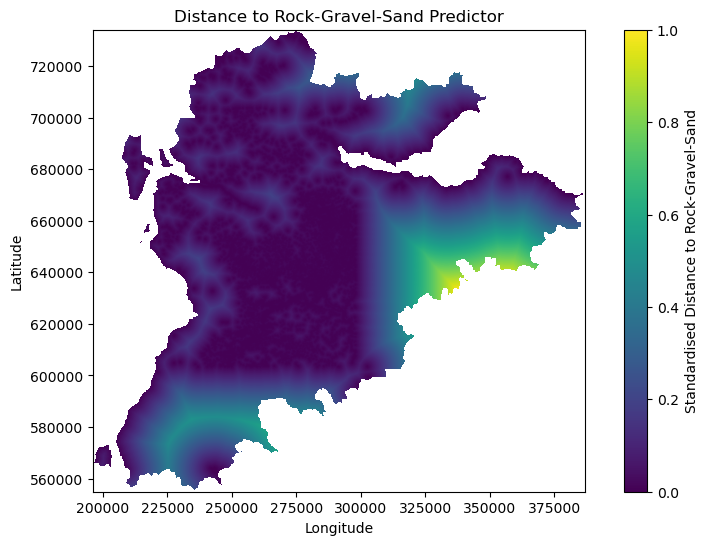

In [22]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/RGS.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Distance to Rock-Gravel-Sand Predictor")
plt.imshow(data, cmap="viridis", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Distance to Rock-Gravel-Sand")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "RGS_Predictor.png"), dpi=300)
plt.show()

### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring alignment with other predictor layers and consistency with the study area's spatial reference.
- **Extent**: The bounding box confirms that the raster fully covers the study area without any unexpected gaps or discrepancies.
- **Resolution**: A resolution of **30m x 30m** is consistent with the standard adopted for all predictors, maintaining uniform spatial detail across datasets.
- **No Data Value**: The no-data value is set to **-9999.0**, ensuring that missing or irrelevant data is excluded from analysis without introducing biases.
- **Data Range**: The raster is properly standardised, with values ranging from **0.0 to 1.0**, making it ready for integration into species distribution modelling (SDM).

#### **Important Note on Predictor Impact**
This predictor represents the **distance to rock-gravel-sand (RGS)**, with higher values (closer to **1**) indicating areas further away from these habitats. Since amphibians may rely on specific features of these habitats for shelter or movement, areas further away are considered **less suitable**. 

In the next section, this predictor will be **adjusted to reflect positive impacts**, where areas closer to RGS (currently 0) will be represented as more suitable (closer to 1). This adjustment ensures ecological relevance and improves interpretability within the SDM.

---

## 9. NDVI Median Predictor

### **Objective**
To visualise and verify the `NDVI Median` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/NDVI_median.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process:

Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


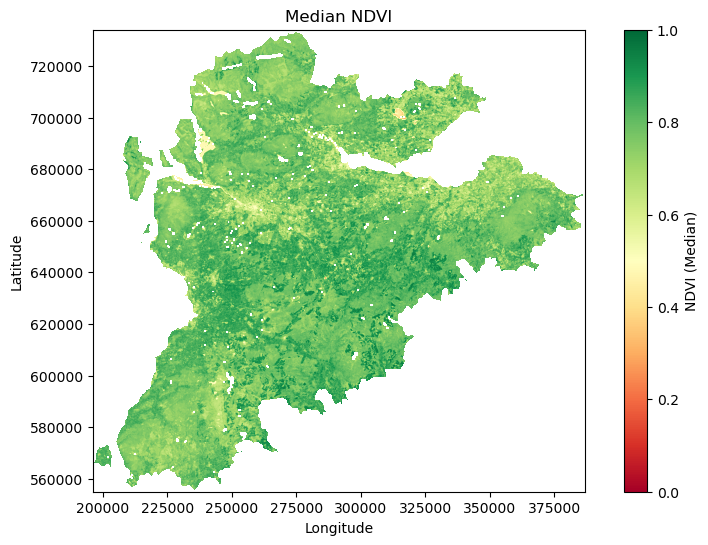

In [27]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/NDVI_median.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Median NDVI")
plt.imshow(data, cmap="RdYlGn", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="NDVI (Median)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "NDVI_Median.png"), dpi=300)
plt.show()


### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial alignment with other predictor layers and compatibility with the study area's coordinate reference system.
- **Extent**: The bounding box confirms that the raster fully covers the study area, with no unexpected discrepancies in spatial boundaries.
- **Resolution**: A resolution of **30m x 30m** is consistent with the standard resolution for all predictors, ensuring uniformity in spatial analysis.
- **No Data Value**: The no-data value is set to **-9999.0**, which prevents missing or irrelevant data from influencing model performance.
- **Data Range**: The predictor is standardised, with values ranging from **0.0 to 1.0**, making it ready for direct integration into species distribution modelling (SDM).

#### **Important Note on Predictor Impact**
This predictor represents **median NDVI**, a positive factor for amphibians. Higher NDVI values (closer to 1) indicate denser vegetation, which provides essential cover, moisture retention, and protection for amphibians. These ecological benefits are well-documented and align with the predictor's suitability for use in SDM. No adjustments are necessary for this layer.

---

## 10. NDVI Standard Deviation

#### **Objective**
To visualise and verify the `NDVI Standard Deviation` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

#### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/NDVI_StDev.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

#### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

#### **Python Implementation**
The accompanying Python code loads the raster, extracts and prints critical metadata, and generates a visual plot of the raster. The no-data values are masked during visualisation to ensure an accurate representation of the layer. The resulting plot is saved as a PNG file in the specified directory.
is layer.


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=196017.49140268576, bottom=554970.9023270598, right=387147.49140268576, top=734160.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


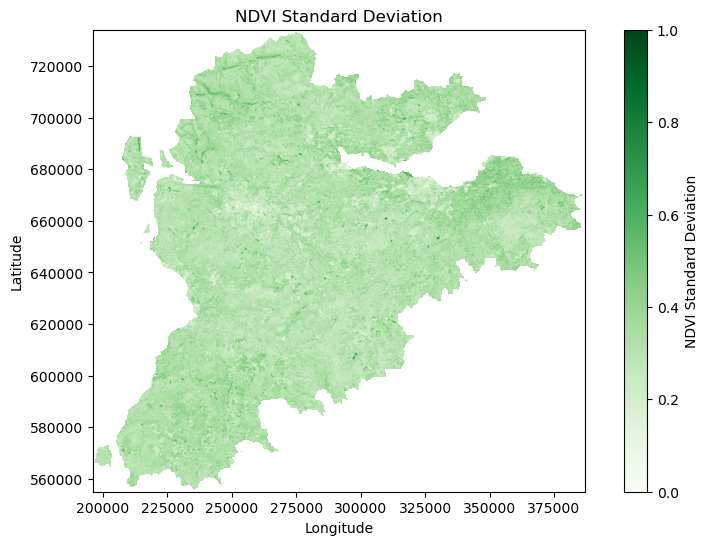

In [32]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/NDVI_StDev.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("NDVI Standard Deviation")
plt.imshow(data, cmap="Greens", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="NDVI Standard Deviation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "NDVI_StDev.png"), dpi=300)
plt.show()

### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring consistency with other predictor layers and spatial alignment with the study area.
- **Extent**: The raster accurately covers the study area's spatial boundaries, as defined by the bounding box.
- **Resolution**: The resolution of **30m x 30m** aligns with the standard resolution for all predictors, ensuring uniformity in spatial analysis and compatibility across the dataset.
- **No Data Value**: The no-data value is set to **-9999.0**, ensuring that missing or irrelevant data does not affect model performance or introduce errors.
- **Data Range**: The predictor is standardised with values ranging from **0.0 to 1.0**, making it directly suitable for species distribution modelling (SDM).

#### **Ecological Interpretation**
The NDVI Standard Deviation reflects variability in vegetation cover over time, representing habitat heterogeneity. Ecologically, areas with higher variability (closer to 1) often indicate diverse habitats, such as edge zones, mixed vegetation patches, or transitional landscapes. These areas typically support higher biodiversity by offering a range of microhabitats and resources.

As currently expressed, higher NDVI Standard Deviation values (closer to 1) represent areas with greater vegetation variability over time, which are considered **more suitable** for amphibians. This aligns with ecological expectations, as these areas are likely to support a diverse range of ecological niches and resources. Therefore, this predictor does not require adjustment and can be directly used in SDMs.

---


## 11. Slope

### **Objective**
To visualise and verify the `Slope` predictor layer for its readiness in species distribution modelling (SDM). The raster will be inspected for metadata consistency, visualised to interpret spatial patterns, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Slope_Proj.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to assess slope variability and spatial patterns within the study area.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and data range will be extracted and evaluated for consistency.
3. **Next Steps**: The raster's suitability for SDM will be determined. If issues are identified, appropriate adjustments will be made.

### **Python Implementation**
The following Python code is used to implement the visualisation and metadata extraction:


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


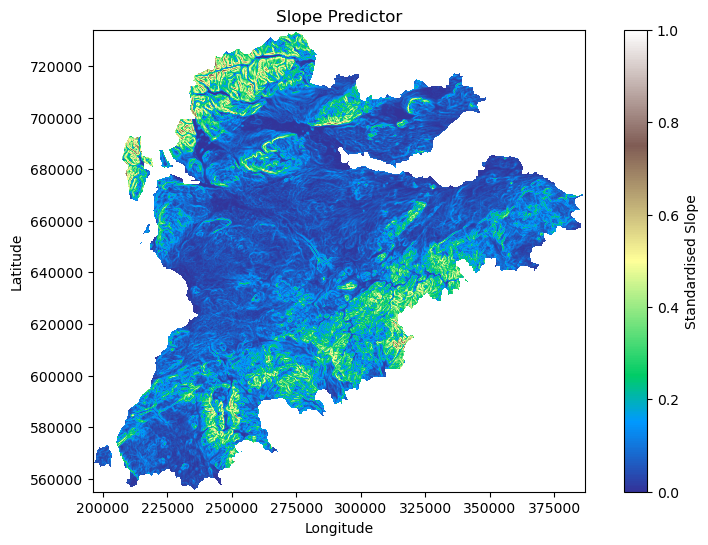

In [33]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Slope_Proj.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Ensure the output directory exists
os.makedirs(output_plot_dir, exist_ok=True)

# Load the raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Slope Predictor")
plt.imshow(data, cmap="terrain", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Slope")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Slope_Predictor.png"), dpi=300)
plt.show()


### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial consistency with the study area and alignment with other predictor layers.
- **Extent**: The raster's spatial extent accurately covers the study area as defined by the bounding box, with no discrepancies in coverage.
- **Resolution**: The resolution of **30m x 30m** matches the standard resolution for all predictors, ensuring uniform spatial analysis and compatibility in modelling.
- **No Data Value**: The no-data value is correctly set to **-9999.0**, ensuring that missing data does not interfere with analysis or introduce biases into the SDM.
- **Data Range**: The predictor is standardised with values ranging from **0.0 to 1.0**, making it suitable for direct integration into SDM workflows.

#### **Ecological Interpretation**
Slope plays a crucial role in determining habitat suitability for amphibians. Steeper slopes can present physical barriers to movement and may reduce connectivity, particularly for species with limited climbing or traversing abilities. Conversely, flatter areas are generally more conducive to movement and may serve as critical corridors for dispersal.

As currently expressed, higher slope values (closer to 1) indicate steeper slopes, which are considered **less suitable** for amphibians. To ensure the predictor aligns with ecological expectations, it will be adjusted in the next step by **inverting the values**. This will represent flatter areas as more suitable (closer to 1) and steeper areas as less suitable (closer to 0).

---

## 12. Soil Moisture Variability

### **Objective**
To visualise and verify the `Soil Moisture Variability` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/SoilMoisture_32bit.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process.


Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195957.49140268576, bottom=554910.9023270598, right=387057.49140268576, top=734070.9023270598)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


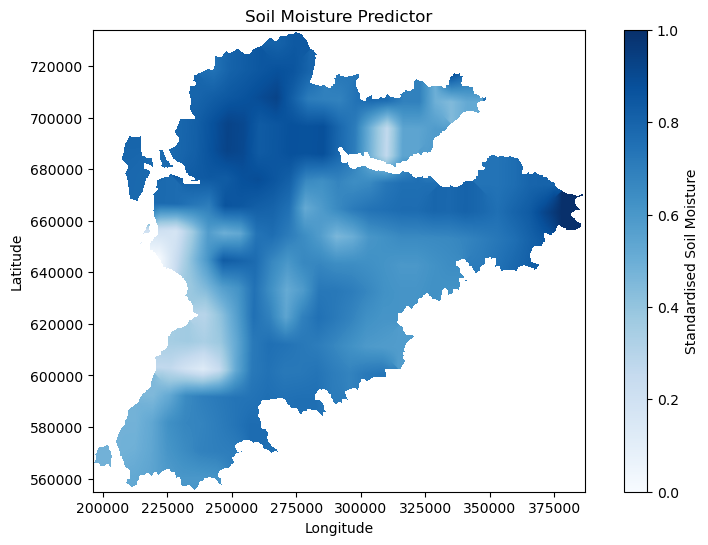

In [34]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/SoilMoisture_32bit.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Soil Moisture Predictor")
plt.imshow(data, cmap="Blues", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Standardised Soil Moisture")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "SoilMoisture_Predictor.png"), dpi=300)
plt.show()

### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring spatial alignment with other predictor layers and consistency with the study area's coordinate reference system.
- **Extent**: The raster accurately covers the spatial boundaries of the study area, as indicated by the bounding box.
- **Resolution**: A resolution of **30m x 30m** matches the standard resolution for all predictors, maintaining uniformity across the dataset and ensuring compatibility in spatial analyses.
- **No Data Value**: The no-data value is correctly set to **-9999.0**, ensuring that missing or irrelevant data does not interfere with the SDM or introduce computational errors.
- **Data Range**: The raster is standardised, with values ranging from **0.0 to 1.0**, making it ready for integration into species distribution modelling (SDM).

#### **Ecological Interpretation**
Soil moisture variability captures temporalchanges in soil moisture levels across the study area. While some variability is natural, excessive fluctuations can indicate unstable or degraded conditions, which may negatively affect amphibians. Amphibians are highly sensitive to moisture levels, relying on stable, moist environments for hydration, thermoregulation, and reproduction. High soil moisture variability can increase desiccation risk and reduce habitat suitability.

#### **Adjustment for Ecological Suitability**
As currently expressed, this predictor reflects a **negative impact on amphibians**, with higher values (closer to 1) indicating greater moisture variability and lower suitability. To align the predictor with ecological expectations, it will be **reversed** in the next step so that areas with lower soil moisture variability (currently 0) will represent more suitable habitats (closer to 1). This adjustment ensures consistency in how positive and negative influences on habitat suitability are represented across all predictors.

---

## 13. Runoff Predictor Layer

### **Objective**
To visualise and verify the `Runoff` predictor layer for its readiness in species distribution modelling (SDM). The raster will be checked for critical metadata, visualised for interpretation, and saved as an image for documentation.

### **File Information**
- **Input Raster**: `C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Runoff.tif`
- **Output Plot Directory**: `C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots`

### **Visualisation and Verification Process**
1. **Visualisation**: The raster will be plotted to visually assess spatial patterns and data distribution.
2. **Metadata Check**: Metadata such as CRS, extent, resolution, no-data value, and valid data range will be extracted.
3. **Next Steps**: Based on the metadata and visualisation, the raster's suitability for SDM will be determined. If issues are found, they will be addressed before proceeding to the next step.

### **Python Implementation**
Below is the Python code used for this process.

Raster Metadata:
CRS: EPSG:27700
Extent: BoundingBox(left=195953.21484855085, bottom=554968.8661739801, right=387023.21484855085, top=734068.8661739801)
Resolution: (30.0, 30.0)
No Data Value: -9999.0
Data Range: 0.0 to 1.0


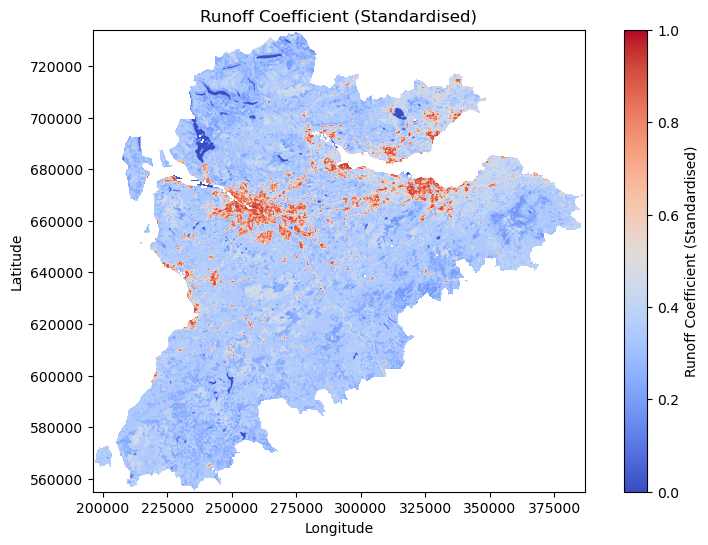

In [65]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
input_raster = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Runoff_Coefficient_Standardised.tif"
output_plot_dir = "C:/GIS_Course/MScThesis-MaviSantarelli/docs/Predictors_Plots"

# Create output directory if it doesn't exist
os.makedirs(output_plot_dir, exist_ok=True)

# Load raster
with rasterio.open(input_raster) as src:
    data = src.read(1)  # Read the first band
    metadata = src.profile
    no_data = src.nodatavals[0]
    
    # Mask no-data values
    data = np.ma.masked_equal(data, no_data)
    
    # Extract raster properties
    crs = src.crs
    extent = src.bounds
    resolution = (src.res[0], src.res[1])
    min_value, max_value = data.min(), data.max()

# Print metadata
print("Raster Metadata:")
print(f"CRS: {crs}")
print(f"Extent: {extent}")
print(f"Resolution: {resolution}")
print(f"No Data Value: {no_data}")
print(f"Data Range: {min_value} to {max_value}")

# Visualise and save plot
plt.figure(figsize=(10, 6))
plt.title("Runoff Coefficient (Standardised)")
plt.imshow(data, cmap="coolwarm", extent=[extent.left, extent.right, extent.bottom, extent.top])
plt.colorbar(label="Runoff Coefficient (Standardised)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=False)
plt.savefig(os.path.join(output_plot_dir, "Runoff_Coefficient_Standardised.png"), dpi=300)
plt.show()


### **Metadata Comments**

#### **Raster Metadata**
- **CRS**: The raster is correctly projected to **EPSG:27700** (British National Grid), ensuring consistency with other predictor layers and alignment with the study area's coordinate reference system.
- **Extent**: The raster accurately covers the spatial boundaries of the study area, as defined by the bounding box.
- **Resolution**: The raster has a resolution of **30m x 30m**, consistent with the standard resolution for all predictors, ensuring compatibility and uniformity across the dataset.
- **No Data Value**: The no-data value is correctly set to **-9999.0**, ensuring that missing or irrelevant data does not affect the model's performance or introduce errors.
- **Data Range**: The predictor is standardised, with values ranging from **0.0 to 1.0**, making it suitable for direct use in species distribution modelling (SDM).

#### **Ecological Interpretation**
The runoff coefficient layer measures the relative imperviousness of land cover types, which directly impacts surface runoff dynamics. Amphibians rely on stable, moist environments, and increased surface runoff from impervious areas can lead to habitat desiccation, reduced water retention, and loss of breeding sites. High runoff values (closer to 1) represent greater imperviousness and a negative impact on amphibian habitats.

#### **Adjustment for Ecological Suitability**
As currently expressed, this predictor reflects a **negative impact on amphibians**, with higher values (closer to 1) indicating greater runoff and lower habitat suitability. To ensure consistent representation of positive habitat suitability across predictors, the raster will be **reversed** in the next step. After adjustment, areas with lower runoff (currently 0) will represent more suitable habitats (closer to 1), aligning the predictor with ecological expectations and ensuring interpretability in the SDM.


---

## 1. Reversing Predictors for Ecological Alignment

#### **Introduction**
In species distribution modelling (SDM), predictor layers must be adjusted to ensure their values align with ecological expectations. For certain predictors, higher values (closer to 1) indicate conditions less suitable for amphibians, such as increased distance from water or higher urban density. To standardise these layers and represent more suitable conditions with values closer to 1, the affected predictors were reversed.

#### **Reversal Process**
The reversal was performed using the following formula in Python:


$$
\text{Reversed\_Value} = 1 - \text{Original\_Value}
$$

This ensures that:
- Areas initially closer to **0** (less favourable) are now closer to **1** (more favourable).
- The no-data value, **-9999**, remains unchanged to avoid influencing the model.

In [66]:
import rasterio
import numpy as np
import os

# Directory and file paths
input_folder = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input"
output_folder = os.path.join(input_folder, "Reversed")

# List of files to reverse
raster_files = [
    "Building_Density.tif",
    "DistWater.tif",
    "Wood_Resample.tif",
    "Traffic.tif",
    "SoilMoisture_32bit.tif",
    "Slope_Proj.tif",
    "Runoff_Coefficient_Standardised.tif",
    "RGS.tif",
    "NOx_Stand.tif"
]

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through files and reverse values
for raster_name in raster_files:
    input_raster_path = os.path.join(input_folder, raster_name)
    output_raster_path = os.path.join(output_folder, raster_name.replace(".tif", "_Reversed.tif"))
    
    with rasterio.open(input_raster_path) as src:
        # Read the data and metadata
        data = src.read(1)
        metadata = src.meta
        no_data_value = src.nodatavals[0]
        
        # Mask no-data values
        data_masked = np.ma.masked_equal(data, no_data_value)
        
        # Reverse valid values (1 - value) and restore no-data
        reversed_data = 1 - data_masked
        reversed_data[data == no_data_value] = no_data_value
        
        # Update metadata for output
        metadata.update(dtype="float32", nodata=no_data_value)
        
        # Save the reversed raster
        with rasterio.open(output_raster_path, "w", **metadata) as dest:
            dest.write(reversed_data.filled(no_data_value), 1)
        
        print(f"Reversed raster saved to: {output_raster_path}")


Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\Building_Density_Reversed.tif
Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\DistWater_Reversed.tif
Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\Wood_Resample_Reversed.tif
Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\Traffic_Reversed.tif
Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\SoilMoisture_32bit_Reversed.tif
Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\Slope_Proj_Reversed.tif
Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\Runoff_Coefficient_Standardised_Reversed.tif
Reversed raster saved to: C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input\Reversed\RGS_Reversed.tif
Reversed rast


## 2. Validation of Reversed Predictors

### **Objective**
To verify that the reversed predictor rasters have been processed correctly, ensuring they are ready for inclusion in species distribution modelling (SDM). This step involves examining metadata and visualising each raster to confirm consistency, correctness, and ecological alignment.

### **Steps for Validation**

1. **Metadata Extraction**:
   For each reversed raster, key metadata properties are examined:
   - **CRS**: Ensures spatial alignment with other predictors by verifying the coordinate reference system is **EPSG:27700** (British National Grid).
   - **Extent**: Confirms the raster covers the full study area.
   - **Resolution**: Checks that the raster resolution is **30m x 30m**, maintaining uniformity across predictors.
   - **No Data Value**: Validates that the no-data value is set to **-9999.0** to prevent computational errors.
   - **Data Range**: Ensures values fall within the standardised range of **0.0 to 1.0**, reflecting the reversed scale.

2. **Visualisation**:
   Each raster is plotted to:
   - Assess spatial patterns and ensure the reversal aligns with ecological expectations.
   - Identify any artefacts or unexpected values.

3. **Confirmation of Suitability**:
   Based on the metadata and visualisation, each raster is validated to ensure:
   - It is properly standardised and reversed.
   - Areas with values closer to **1** represent more favourable conditions for amphibians, while **0** represents less favourable conditions.

### **Outcome**
The validation process confirms that:
- The reversal was correctly applied to the specified rasters, ensuring consistency in ecological interpretation.
- All rasters are aligned spatially and ready for integration into the SDM pipeline.

This step ensures that predictor layers accurately represent their intended ecological effects, contributing to reliable model outputs. If any discrepancies are found, adjustments will be made before proceeding.


Metadata for Building_Density_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


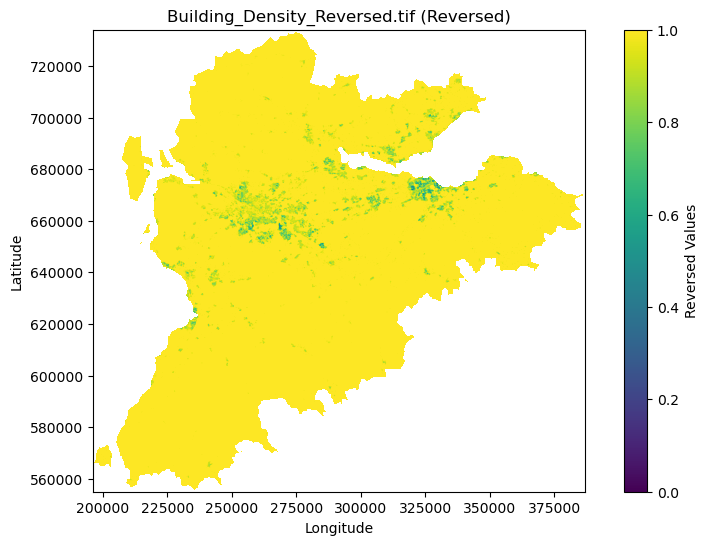

Metadata for DistWater_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195962.10163310927, bottom=554933.5372726112, right=387032.10163310927, top=734063.5372726112)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


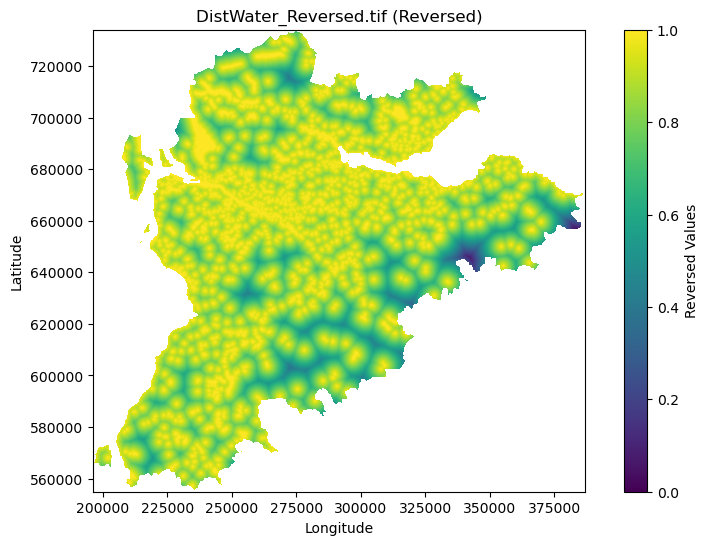

Metadata for Wood_Resample_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


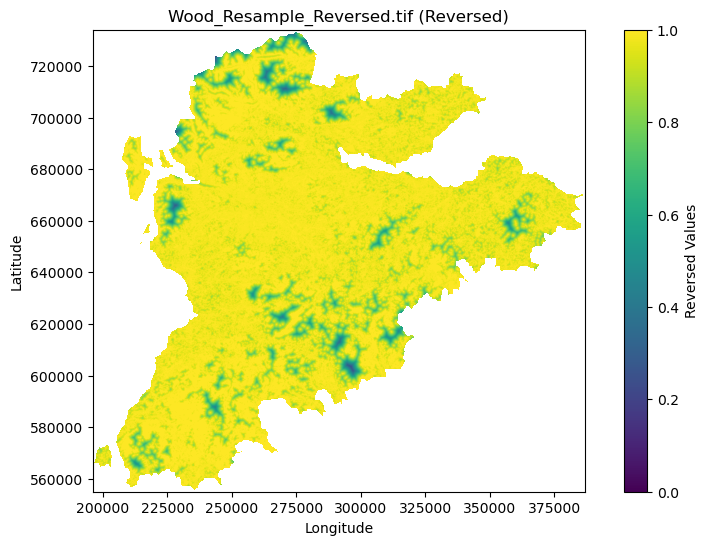

Metadata for Traffic_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


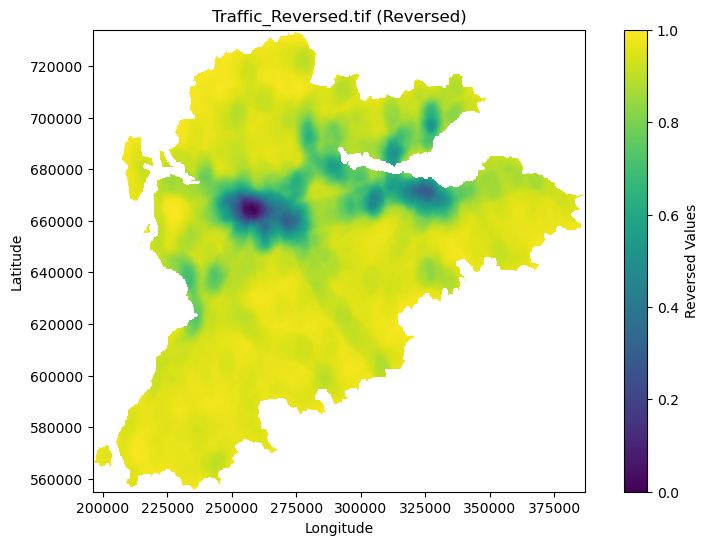

Metadata for SoilMoisture_32bit_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195957.49140268576, bottom=554910.9023270598, right=387057.49140268576, top=734070.9023270598)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


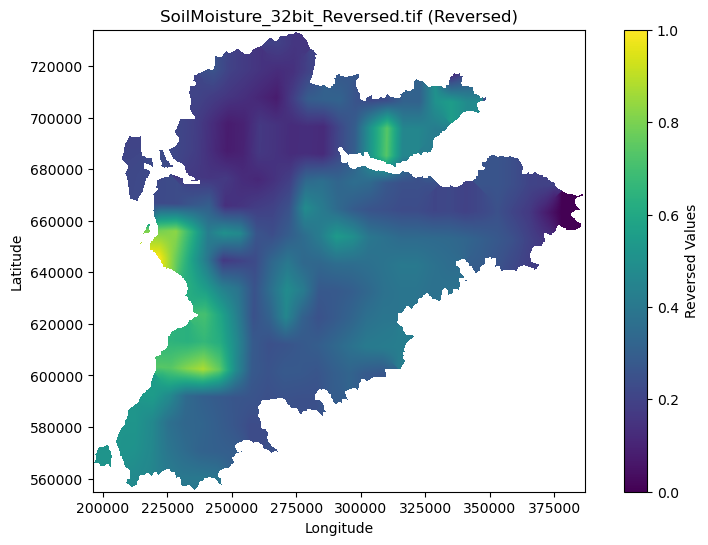

Metadata for Slope_Proj_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195957.49140268576, bottom=554940.9023270598, right=387027.49140268576, top=734070.9023270598)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


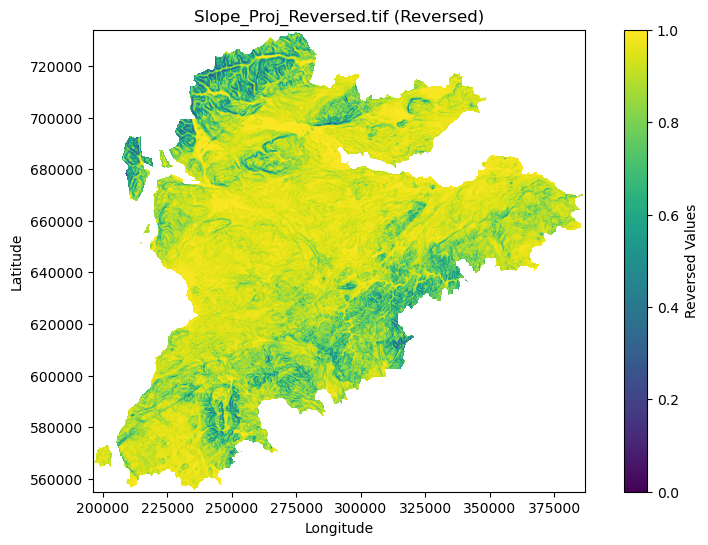

Metadata for Runoff_Coefficient_Standardised_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195953.21484855085, bottom=554968.8661739801, right=387023.21484855085, top=734068.8661739801)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


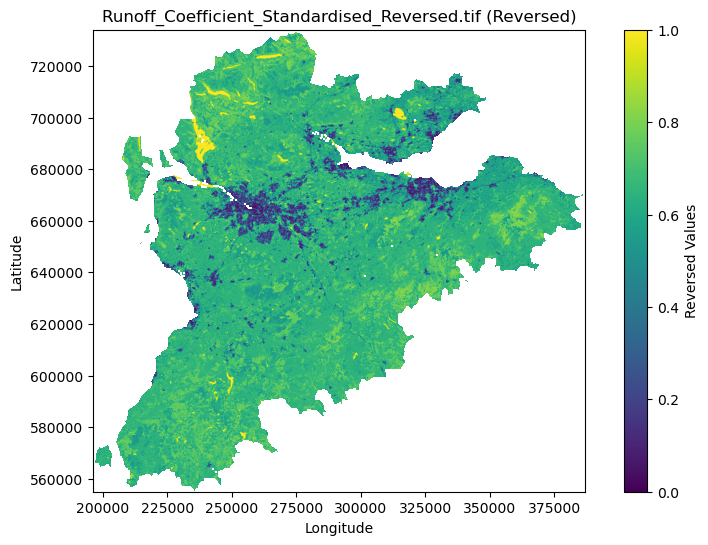

Metadata for RGS_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195962.10163310927, bottom=554933.5372726112, right=387032.10163310927, top=734063.5372726112)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


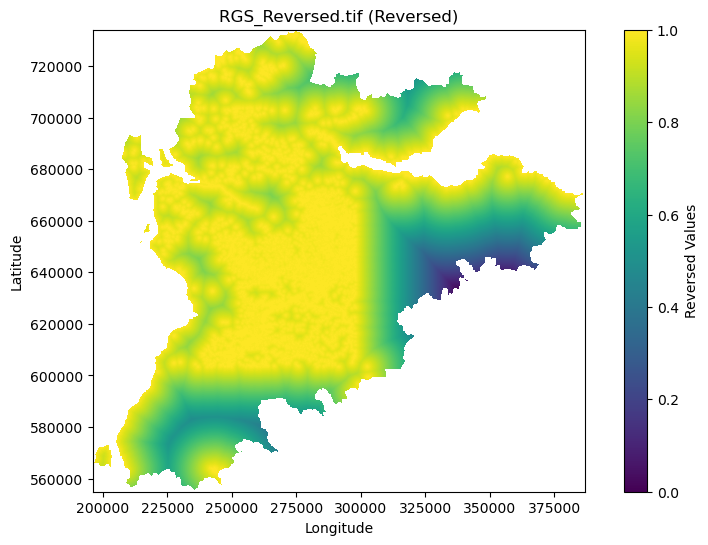

Metadata for NOx_Stand_Reversed.tif:
  CRS: EPSG:27700
  Extent: BoundingBox(left=195962.10163310927, bottom=554933.5372726112, right=387032.10163310927, top=734063.5372726112)
  Resolution: (30.0, 30.0)
  No Data Value: -9999.0
  Data Range: 0.0 to 1.0
--------------------------------------------------


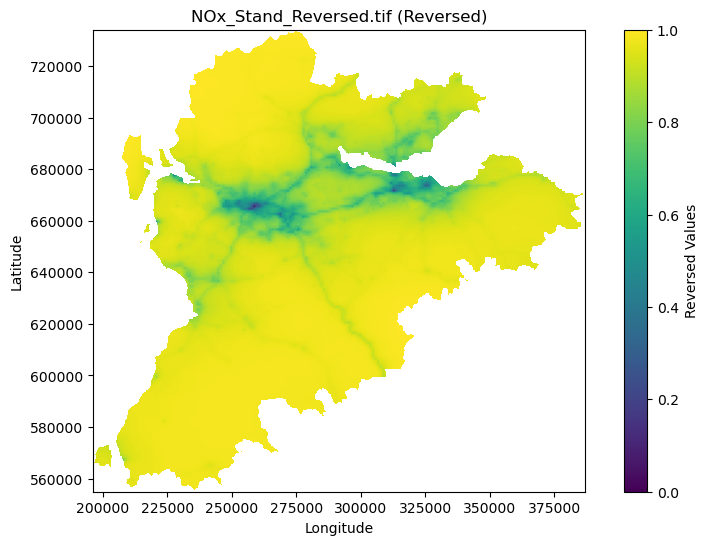

In [67]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# Directory of reversed rasters
reversed_folder = "C:/GIS_Course/MScThesis-MaviSantarelli/data/Predictors/Input/Reversed"

# List of reversed raster files
reversed_rasters = [
    "Building_Density_Reversed.tif",
    "DistWater_Reversed.tif",
    "Wood_Resample_Reversed.tif",
    "Traffic_Reversed.tif",
    "SoilMoisture_32bit_Reversed.tif",
    "Slope_Proj_Reversed.tif",
    "Runoff_Coefficient_Standardised_Reversed.tif",
    "RGS_Reversed.tif",
    "NOx_Stand_Reversed.tif"
]

# Process each raster
for raster_name in reversed_rasters:
    raster_path = os.path.join(reversed_folder, raster_name)
    
    with rasterio.open(raster_path) as src:
        # Read data and metadata
        data = src.read(1)
        metadata = src.profile
        no_data = src.nodatavals[0]
        
        # Mask no-data values for display
        data_masked = np.ma.masked_equal(data, no_data)
        
        # Extract raster properties
        crs = src.crs
        extent = src.bounds
        resolution = (src.res[0], src.res[1])
        min_value, max_value = data_masked.min(), data_masked.max()
        
        # Print metadata
        print(f"Metadata for {raster_name}:")
        print(f"  CRS: {crs}")
        print(f"  Extent: {extent}")
        print(f"  Resolution: {resolution}")
        print(f"  No Data Value: {no_data}")
        print(f"  Data Range: {min_value} to {max_value}")
        print("-" * 50)
        
        # Visualise the raster
        plt.figure(figsize=(10, 6))
        plt.title(f"{raster_name} (Reversed)")
        plt.imshow(data_masked, cmap="viridis", extent=[extent.left, extent.right, extent.bottom, extent.top])
        plt.colorbar(label="Reversed Values")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(visible=False)
        plt.show()
